# Data Loading Techniques

This notebook shows different ways to load and create PupilMeasurement objects:
- Loading from files
- Creating from arrays
- Setting light stimuli
- Data validation

## How to use this notebook

Run the cells top-to-bottom. The examples use `pypipr`'s small simulated dataset and synthetic data to show common workflows.

Requirements: `pypipr`, `numpy`, and `matplotlib` should be available in your environment. If you are using the project virtualenv, these are already installed.

Tip: you can replace the simulated data calls with your own time and size arrays to work with real recordings.

In [1]:
# Import necessary libraries
import pypipr
import numpy as np
import matplotlib.pyplot as plt


## Loading built-in (simulated) data

`pypipr` provides a small simulated pupil dataset useful for examples and tests. The call below shows how to load those simulated measurements and plot them.

You will see two sample measurements plotted together and the light-stimulus interval overlaid.

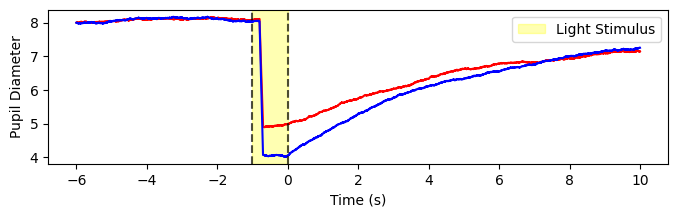

In [2]:
# Loading from built-in data
fig, ax = plt.subplots(1, 1, figsize=(8, 2))

pm_blue = pypipr.load_simulated_pupil(blue_or_red='red')
pm_blue.plot(ax=ax, color='red')


pm_red = pypipr.load_simulated_pupil(blue_or_red='blue')
pm_red.plot(ax=ax, color='blue')

pm_red.plot_light_stimulus(ax=ax, color='yellow', alpha=0.3)

ax.legend()
plt.show()

## Creating synthetic data from arrays

Sometimes you want to build a `PupilMeasurement` directly from time and size arrays (for example, after preprocessing or simulation). The snippet below creates a sinusoidal + noise pupil size series and constructs a `PupilMeasurement` object from it.

Replace the generated arrays with your real `time` and `size` data when ready.

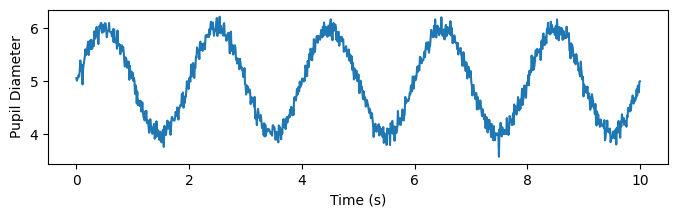

In [3]:
# Creating "random" data from arrays
time_data = np.linspace(0, 10, 1000)
size_data = 5 + np.sin(2 * np.pi * 0.5 * time_data) + np.random.normal(0, 0.1, size=time_data.shape)

# Creating a new PupilMeasurement from arrays
sin_pm = pypipr.PupilMeasurement(time_data=time_data, size_data=size_data)

# Plotting the created PupilMeasurement
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
sin_pm.plot(ax=ax)
plt.show()

## Working with existing measurement arrays

You can extract raw arrays from an existing `PupilMeasurement` (for example, the simulated `pm_blue`) using `get_time()` and `get_size()`. Those arrays are plain `numpy` arrays which you can inspect, modify, or save. The example below prints the types and first elements, rebuilds a `PupilMeasurement` from them, and plots the result.

This is useful when you have a pipeline that outputs arrays and you want to re-wrap them into `PupilMeasurement` for convenience.

Type and shape of arrays
Type of time_data: <class 'numpy.ndarray'>, shape of time_data: (15999,)
Type of size_data: <class 'numpy.ndarray'>, shape of size_data: (15999,)

First few elements of data:
Index:  0	1	2	3	4	
Time:   -6.000	-5.999	-5.998	-5.997	-5.996	
Size:   8.001	8.002	8.002	8.001	8.000	


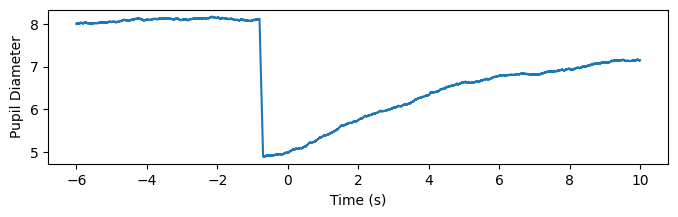

In [4]:
# We get the time data and pupil size data from the previous example, to work with more realistic data. This array can contain your real data.
time_data = pm_blue.get_time()
size_data = pm_blue.get_size()

# Let's show that it's a regular numpy array
print("Type and shape of arrays")
print(f"Type of time_data: {type(time_data)}, shape of time_data: {time_data.shape}")
print(f"Type of size_data: {type(size_data)}, shape of size_data: {size_data.shape}")
print("")
print("First few elements of data:")
print("Index: ", "".join([f"{i}\t" for i in range(5)]))
print("Time:  ", "".join([f"{time_data[i]:.3f}\t" for i in range(5)]))
print("Size:  ", "".join([f"{size_data[i]:.3f}\t" for i in range(5)]))
# Creating a new PupilMeasurement from arrays
pm = pypipr.PupilMeasurement(time_data=time_data, size_data=size_data)

# Plotting the created PupilMeasurement
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
pm.plot(ax=ax)
plt.show()


## Setting and plotting light stimuli

You can add a light-stimulus interval to a `PupilMeasurement` using `set_light_stimulus(start, end)`. The `plot_light_stimulus` helper overlays that interval on your figure. Adjust `start`/`end` to match your experiment timing.

The example below sets a stimulus from `-1` to `0` (relative to the measurement's time base) and shows the overlay.

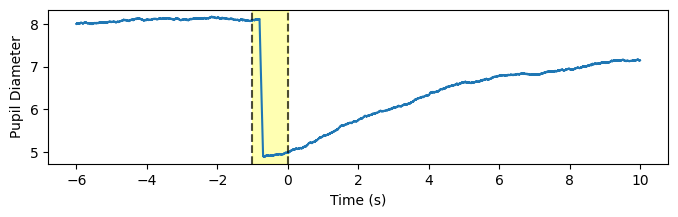

In [5]:
# Setting light stimuli
pm.set_light_stimulus(start=-1, end=0)

fig, ax = plt.subplots(1, 1, figsize=(8, 2))
pm.plot(ax=ax)
pm.plot_light_stimulus(ax=ax)
plt.show()